<a href="https://colab.research.google.com/github/martakrusz/Data_Sience_Pandas_Python/blob/main/Data_Science_tasks_with_Pandas_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g6l9dkwSepCtPdPJxH67PRGtGWBLs5j5fPJSV7YOkZhoIP6j-ieilk
Mounted at /content/drive


In [2]:
import pandas as pd
import os

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Sales_Analysis/Sales_Data/Sales_April_2019.csv')
df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"


In [4]:
files = [file for file in os.listdir('/content/drive/MyDrive/Sales_Analysis/Sales_Data')]

all_months_data = pd.DataFrame()
for file in files:
  df = pd.read_csv('/content/drive/MyDrive/Sales_Analysis/Sales_Data/'+file)
  all_months_data = pd.concat([all_months_data, df])
 
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


In [ ]:
all_months_data.to_csv('/content/drive/MyDrive/Sales_Analysis/all_data.csv', index = False)

In [6]:
all_data = pd.read_csv('/content/drive/MyDrive/Sales_Analysis/all_data.csv')
all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"


# Clean up the data

Drop rows of NaN

In [ ]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data = all_data.dropna(how="all") #drop all walues in row
all_data.head(3)

Find "Or" and delete it

In [8]:
#Find problematic values
temp_df = all_data.loc[all_data['Order Date'].str[0:2] == 'Or']
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
211,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
243,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1291,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1412,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1427,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [9]:
#Detele problematic values to clean the data by replacing all_data whith the new one without data tha we do not gonna use
all_data = all_data.loc[all_data['Order Date'].str[0:2] != 'Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


Add Month Cloumn

In [ ]:
# Add new column - get the data from column Order Date where 2 first characters are number of the monht 

all_data['Month'] = all_data['Order Date'].str[0:2]#get
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head(3)

Convert Quantity Ordered and Price Each columns to correct type

In [11]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int32')
all_data['Price Each'] = all_data['Price Each'].astype('float')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8


In [12]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

#Question 1: What was the best month for sales? How much was earned that month?

In [13]:
all_data['Walue'] = all_data['Quantity Ordered']* all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Walue
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.00
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.68
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.68


Group data by month

In [14]:
results = all_data.groupby('Month').sum()

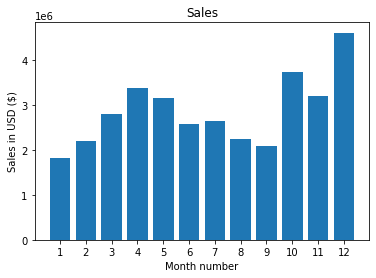

In [15]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months, results['Walue'])
plt.title('Sales')
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')

plt.show()

Question 2: What city had the highest number of sales# Nowa sekcja

# Question 2: What city had the highest number of sales

In [16]:
# all_data[['Street', 'City', 'Code']] = all_data['Purchase Address'].str.split(',', expand=True)


In [17]:
# all_data['City'] = all_data['City'] + ' ' + '(' + all_data['Code'].str[1:3] + ')'


In [18]:
results = all_data.groupby('City').sum()
results

KeyError: ignored

In [ ]:
cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, results['Walue'])
plt.title('Sales in cities')
plt.xticks(cities, rotation = 'vertical', size=10)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City name')

plt.show()

# Question 3: What time should we display advertisments to maximize likelihood of customer's buying product?

In [ ]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date']) #convert Order Date to datetime type

In [ ]:
all_data['Hour'] = all_data['Order Date'].dt.hour # add Hour column
all_data['Minute'] = all_data['Order Date'].dt.minute #add Minute column
all_data.head()

In [ ]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count())
plt.title('Sales by hours')
plt.xticks(hours)
plt.grid()
plt.xlabel('Hours')
plt.ylabel('Number of orders')

plt.show()

#The best hours for advertisments are around 11 am and 7 pm

# Question 4: What products ale most often sold together?


In [ ]:
common_orders = all_data[all_data['Order ID'].duplicated(keep=False)]
common_orders['Grouped'] = common_orders.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
common_orders = common_orders[['Order ID', 'Grouped']].drop_duplicates()
common_orders.head()

In [ ]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in common_orders['Grouped']:
  row_list = row.split(',')
  count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
  print(key, value)

  #The most often coustomers was buing Iphone and Lightning Charging Cable 

# Question 5: What product sold the most? Why do you think it sold the most?

In [ ]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.title('Product by sale')
plt.xticks(products, rotation = 'vertical', size=10)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product name')

plt.show()



In [ ]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx() 

ax1.bar(products, quantity_ordered, color='g') 
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name') 
ax1.set_ylabel('Quantity Ordered', color = 'g') 
ax2.set_ylabel('Price ($)', color ='b') 
ax1.set_xticklabels(products, rotation = 'vertical', size=10)

plt.show()
#The bestsellers are product whith low price.